#### 데이터 분석, 시각화
1. 주제 선정 : 마약 연계 범죄 현황 / 심각성

2. 데이터 선정 : kosis.kr 범죄자 마약류 등 상용여부 (경찰청,경찰청범죄통계, 2011~2021, 전국단위)

3. 분석 목표
  * 2011~2021년 내 마약류 관리에 관한 법률 위반 범죄 건수의 증감 추이

4. 데이터 읽어오기, 전처리, 통합 => 단일 df

5. 데이터 탐색 (EDA)

6. 분석 목표별 분석 및 시각화

7. 결론.

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [122]:
df_total = pd.read_csv('./data/범죄자_마약류_등_상용여부_20230418163024.csv', encoding='cp949', header=[0,1,2])

df_total = df_total.set_index(list(df_total.columns[:3])).stack(level=0)
df_total.index.names=['범죄1', '범죄2', '범죄3', '시점']
df_total.columns=['대마','마약','대마+마약+항정', '항정', '미상', '환각', '알코올', '합계', '해당무']
df_total = df_total.reset_index()
df_total['구분'] = pd.Series(['전체']*len(df_total))

df_total

,범죄1,범죄2,범죄3,시점,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무,구분
0,합계,소계,소계,2014,527,672,3922,2723,639835,331,152037,1879548,1083423,전체
1,합계,소계,소계,2015,187,411,1456,858,693962,216,137226,1948966,1116106,전체
2,합계,소계,소계,2016,107,239,1056,710,705501,221,127388,2020196,1186030,전체
3,합계,소계,소계,2017,149,264,1238,825,669437,211,122001,1861796,1068909,전체
4,합계,소계,소계,2018,633,466,4501,3402,669674,234,118506,1749459,956544,전체
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,특별법범,주요 특별법범,특가법(도주차량),2017,-,-,3,3,1514,-,496,5628,3615,전체
604,특별법범,주요 특별법범,특가법(도주차량),2018,1,0,1,0,939,0,343,3429,2146,전체
605,특별법범,주요 특별법범,특가법(도주차량),2019,-,-,-,-,228,1,62,568,277,전체
606,특별법범,주요 특별법범,특가법(도주차량),2020,1,-,5,4,3397,-,864,9902,5636,전체


In [123]:
def my_read_csv(filename, label) :
  dfx = pd.read_csv(filename, encoding='cp949', header=[0,1,2])
  dfx = dfx.set_index(list(dfx.columns[:3])).stack(level=0)
  dfx.index.names=['범죄1', '범죄2', '범죄3', '시점']
  dfx.columns=['대마','마약','대마+마약+항정', '항정', '미상', '환각', '알코올', '합계', '해당무']
  dfx = dfx.reset_index()
  dfx['구분'] = pd.Series([label]*dfx.shape[0])
  return dfx

In [124]:
df_total_2 = my_read_csv('./data/범죄자_마약류_등_상용여부_20230418163024.csv', '전체')

df_total_2

,범죄1,범죄2,범죄3,시점,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무,구분
0,합계,소계,소계,2014,527,672,3922,2723,639835,331,152037,1879548,1083423,전체
1,합계,소계,소계,2015,187,411,1456,858,693962,216,137226,1948966,1116106,전체
2,합계,소계,소계,2016,107,239,1056,710,705501,221,127388,2020196,1186030,전체
3,합계,소계,소계,2017,149,264,1238,825,669437,211,122001,1861796,1068909,전체
4,합계,소계,소계,2018,633,466,4501,3402,669674,234,118506,1749459,956544,전체
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,특별법범,주요 특별법범,특가법(도주차량),2017,-,-,3,3,1514,-,496,5628,3615,전체
604,특별법범,주요 특별법범,특가법(도주차량),2018,1,0,1,0,939,0,343,3429,2146,전체
605,특별법범,주요 특별법범,특가법(도주차량),2019,-,-,-,-,228,1,62,568,277,전체
606,특별법범,주요 특별법범,특가법(도주차량),2020,1,-,5,4,3397,-,864,9902,5636,전체


In [125]:
df_excon = my_read_csv('./data/전과자_마약류_등_상용여부_20230418163210.csv', '전과자')

df_excon

,범죄1,범죄2,범죄3,시점,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무,구분
0,합계,소계,소계,2014,306,390,2963,2267,19637,267,106068,852244,723309,전과자
1,합계,소계,소계,2015,100,162,886,624,17368,159,95760,859477,745304,전과자
2,합계,소계,소계,2016,79,133,760,548,17820,143,89147,897996,790126,전과자
3,합계,소계,소계,2017,77,129,779,573,16459,131,84905,811653,709379,전과자
4,합계,소계,소계,2018,425,318,3426,2683,13994,172,83643,731911,630676,전과자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,특별법범,주요 특별법범,특가법(도주차량),2017,-,-,3,3,10,-,369,2909,2527,전과자
548,특별법범,주요 특별법범,특가법(도주차량),2018,1,0,1,0,5,0,256,1760,1498,전과자
549,특별법범,주요 특별법범,특가법(도주차량),2019,0,0,0,0,1,1,48,246,196,전과자
550,특별법범,주요 특별법범,특가법(도주차량),2020,1,-,5,4,14,-,631,4574,3924,전과자


In [126]:
df = pd.concat((df_total_2, df_excon), axis=0)

df

,범죄1,범죄2,범죄3,시점,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무,구분
0,합계,소계,소계,2014,527,672,3922,2723,639835,331,152037,1879548,1083423,전체
1,합계,소계,소계,2015,187,411,1456,858,693962,216,137226,1948966,1116106,전체
2,합계,소계,소계,2016,107,239,1056,710,705501,221,127388,2020196,1186030,전체
3,합계,소계,소계,2017,149,264,1238,825,669437,211,122001,1861796,1068909,전체
4,합계,소계,소계,2018,633,466,4501,3402,669674,234,118506,1749459,956544,전체
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,특별법범,주요 특별법범,특가법(도주차량),2017,-,-,3,3,10,-,369,2909,2527,전과자
548,특별법범,주요 특별법범,특가법(도주차량),2018,1,0,1,0,5,0,256,1760,1498,전과자
549,특별법범,주요 특별법범,특가법(도주차량),2019,0,0,0,0,1,1,48,246,196,전과자
550,특별법범,주요 특별법범,특가법(도주차량),2020,1,-,5,4,14,-,631,4574,3924,전과자


In [127]:
f1 = df_total_2['범죄1'] != '합계'
f2 = df_total_2['범죄2'] != '소계'
f3 = df_total_2['범죄3'] != '소계'

df1 = df_total_2[f1 & f2 & f3]
df1 = df1.reset_index(drop=True)

df1

,범죄1,범죄2,범죄3,시점,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무,구분
0,형법범,재산범죄,절도,2014,6,18,55,31,8476,13,2015,96901,86342,전체
1,형법범,재산범죄,절도,2015,2,10,21,9,9254,7,1685,104246,93279,전체
2,형법범,재산범죄,절도,2016,3,2,12,7,9593,6,1701,107308,95996,전체
3,형법범,재산범죄,절도,2017,1,6,18,11,10683,4,1755,106656,94196,전체
4,형법범,재산범죄,절도,2018,5,12,42,25,10502,5,1993,98305,85763,전체
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,특별법범,주요 특별법범,특가법(도주차량),2017,-,-,3,3,1514,-,496,5628,3615,전체
508,특별법범,주요 특별법범,특가법(도주차량),2018,1,0,1,0,939,0,343,3429,2146,전체
509,특별법범,주요 특별법범,특가법(도주차량),2019,-,-,-,-,228,1,62,568,277,전체
510,특별법범,주요 특별법범,특가법(도주차량),2020,1,-,5,4,3397,-,864,9902,5636,전체


In [131]:
# for col_name in df1 :
#   print(col_name, df1[col_name].hasnans)
#   print(df1[col_name].unique())


df1.replace('-', '0', inplace=True)

df1.iloc[:, 3:-1] = df1.iloc[:, 3:-1].astype(np.int64)

# for c in df1.iloc[:, 3:-1] :
#   df1[c] = df1[c].astype(np.int64)

print(df1.dtypes)

범죄1         object
범죄2         object
범죄3         object
시점           int64
대마           int64
마약           int64
대마+마약+항정     int64
항정           int64
미상           int64
환각           int64
알코올          int64
합계           int64
해당무          int64
구분          object
dtype: object


In [129]:
g1 = df1.groupby('시점')

g1.sum()  #문자는 sum 적용이 되지 않아 자동으로 삭제처리

C:\Users\ITPS\AppData\Local\Temp\ipykernel_13268\2990967501.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g1.sum()  #문자는 sum 적용이 되지 않아 자동으로 삭제처리


,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무
시점,,,,,,,,,
2014,518,603,3762,2641,480203,60,148683,1510763,878055
2015,184,374,1389,831,524287,24,134206,1569794,909888
2016,106,206,1002,690,538314,36,124351,1612610,948907
2017,145,221,1164,798,506726,23,118504,1474156,847739
2018,619,405,4366,3342,513765,24,114353,1393267,760759
2019,1052,483,5618,4083,525405,52,98881,1391238,761282
2020,1204,532,5828,4092,501963,17,95057,1323473,720608
2021,1133,513,5474,3828,355427,13,86139,1068928,621875


In [130]:
g2 = df1.groupby(['시점', '범죄2'])
df2 = g2.sum()

df2 = df2.reset_index()

df2.sort_values(['대마', '시점'], ascending=False)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_13268\1288693265.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = g2.sum()


,시점,범죄2,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무
61,2020,주요 특별법범,1160,466,5567,3941,139562,0,58388,380058,176541
70,2021,주요 특별법범,1093,456,5164,3615,110735,0,55632,327999,156468
52,2019,주요 특별법범,989,398,5287,3900,145263,6,59405,400553,190592
43,2018,주요 특별법범,561,320,4046,3165,137896,3,75461,429991,212585
7,2014,주요 특별법범,493,490,3452,2469,145257,8,102850,560904,309337
...,...,...,...,...,...,...,...,...,...,...,...
14,2015,위조범죄,0,0,1,1,12067,0,44,22478,10366
17,2015,풍속범죄,0,4,7,3,2560,0,547,30324,27210
2,2014,공무원범죄,0,1,1,0,3197,0,3,4228,1027
3,2014,과실범죄,0,2,5,3,2103,1,120,8371,6142


In [134]:
filter1 = df1['범죄3'].apply(lambda x : '마약' in x)
g3 = df1[filter1].groupby('시점')

df3 = g3.sum().reset_index()

df3

C:\Users\ITPS\AppData\Local\Temp\ipykernel_13268\1341058923.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = g3.sum().reset_index()


,시점,대마,마약,대마+마약+항정,항정,미상,환각,알코올,합계,해당무
0,2014,489,460,3389,2440,1768,4,2,6882,1719
1,2015,164,280,1159,715,2255,0,1,8876,5461
2,2016,86,135,816,595,2378,0,2,9989,6793
3,2017,136,168,1002,698,2404,0,1,10361,6954
4,2018,553,307,3990,3130,1956,0,4,9003,3053
5,2019,979,382,5240,3879,2244,2,5,11246,3755
6,2020,1155,457,5519,3907,2555,0,6,13273,5193
7,2021,1086,447,5107,3574,1986,0,4,11268,4171


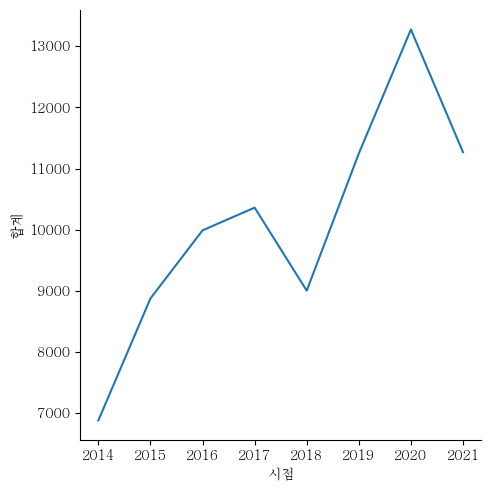

In [137]:
sns.relplot(data=df3, x='시점', y='합계', kind='line')

In [138]:
np.corrcoef(df3['합계'], df3['시점'])

array([[1.        , 0.83560216],
       [0.83560216, 1.        ]])